# Telco customer churn prediction - Logistic Regression

## Importing the libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

In [3]:
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.5.3


## Importing the dataset

In [42]:
dataset = pd.read_csv('Telco-Customer-Churn.csv')
dataset= dataset.drop(['customerID'],axis =1)

In [43]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [44]:
dataset.describe(include=object).T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


In [45]:
#check missing values
dataset.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [46]:
dataset.shape

(7043, 20)

In [47]:
dataset['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

##### imbalaced dataset

In [48]:
dataset[pd.isnull(dataset).any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


#### So 11 null value under not churn type (Churn = 'No'), therefore we can remove it from dataset

In [49]:
dataset = dataset.dropna()

In [50]:
dataset.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## EDA

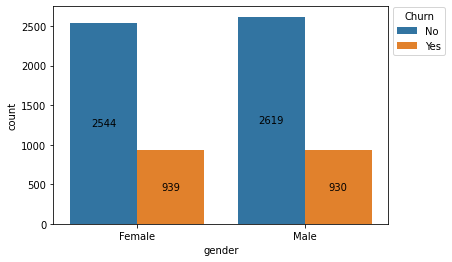

In [51]:
#Gender vs Label
ax = sns.countplot(data=dataset, x='gender', hue='Churn')
sns.move_legend(ax, bbox_to_anchor=(1, 1.02), loc='upper left')

for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

#### Both gender have equal label

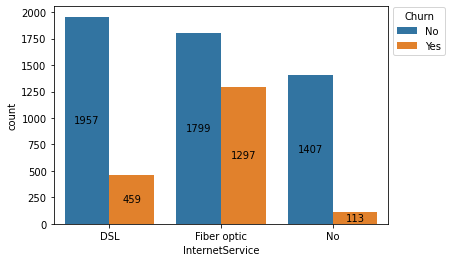

In [52]:
#Internet service vs Label

ax = sns.countplot(data=dataset, x='InternetService', hue='Churn')
sns.move_legend(ax, bbox_to_anchor=(1, 1.02), loc='upper left')

for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

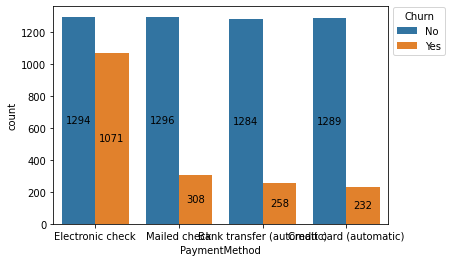

In [53]:
#PaymentMethod vs Label

ax = sns.countplot(data=dataset, x='PaymentMethod', hue='Churn')
sns.move_legend(ax, bbox_to_anchor=(1, 1.02), loc='upper left')

for c in ax.containers:
    
    # set the bar label
    ax.bar_label(c, label_type='center')

## Categorical Variables Encoding

In [54]:
dataset['Churn'] = dataset['Churn'].map({'Yes':1,'No':0})

In [55]:
categorical = [var for var in dataset.columns if dataset[var].dtype=='O']

In [56]:
def category(df):
    for var in categorical:
        ordered_labels = df.groupby([var])['Churn'].mean().sort_values().index

        ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
        ordinal_label
        df[var] = df[var].map(ordinal_label)

category(dataset)

In [57]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,1,0,0,1,2,1,2,2,2,2,2,1,3,29.85,29.85,0
1,0,0,1,1,34,1,1,1,1,2,1,2,2,2,1,0,2,56.95,1889.50,0
2,0,0,1,1,2,1,1,1,1,1,2,2,2,2,2,1,2,53.85,108.15,1
3,0,0,1,1,45,0,0,1,1,2,1,1,2,2,1,0,1,42.30,1840.75,0
4,1,0,1,1,2,1,1,2,2,2,2,2,2,2,2,1,3,70.70,151.65,1


## Splitting the dataset into the Training set and Test set

In [58]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [60]:
print(X_train)

[[1.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 1.08650e+02
  7.72635e+03]
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 1.00000e+00 1.99500e+01
  1.37770e+03]
 [1.00000e+00 0.00000e+00 1.00000e+00 ... 3.00000e+00 8.92000e+01
  9.90300e+02]
 ...
 [0.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 1.05950e+02
  5.34180e+03]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 0.00000e+00 8.04500e+01
  1.13705e+03]
 [0.00000e+00 0.00000e+00 1.00000e+00 ... 0.00000e+00 1.04650e+02
  6.88980e+03]]


In [61]:
print(y_train)

[0 0 0 ... 1 0 0]


In [62]:
print(X_test)

[[0.00000e+00 0.00000e+00 1.00000e+00 ... 3.00000e+00 2.06500e+01
  2.06500e+01]
 [0.00000e+00 0.00000e+00 1.00000e+00 ... 0.00000e+00 2.06000e+01
  3.30250e+02]
 [1.00000e+00 0.00000e+00 1.00000e+00 ... 0.00000e+00 1.98000e+01
  1.98000e+01]
 ...
 [0.00000e+00 0.00000e+00 1.00000e+00 ... 3.00000e+00 5.43500e+01
  5.43500e+01]
 [0.00000e+00 1.00000e+00 1.00000e+00 ... 1.00000e+00 6.52500e+01
  3.52995e+03]
 [1.00000e+00 0.00000e+00 0.00000e+00 ... 2.00000e+00 1.98500e+01
  1.07050e+03]]


In [63]:
print(y_test)

[0 0 0 ... 1 0 0]


## Feature Scaling

In [64]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [65]:
print(X_train)

[[ 1.00570455 -0.43679284 -1.03827462 ... -0.60282303  1.46066229
   2.41646936]
 [-0.9943278  -0.43679284 -1.03827462 ... -0.60282303 -1.4956825
  -0.39270455]
 [ 1.00570455 -0.43679284  0.96313632 ...  1.13307031  0.81239954
  -0.56412272]
 ...
 [-0.9943278  -0.43679284 -1.03827462 ... -1.4707697   1.37067209
   1.36134494]
 [ 1.00570455 -0.43679284 -1.03827462 ... -1.4707697   0.52076462
  -0.49918824]
 [-0.9943278  -0.43679284  0.96313632 ... -1.4707697   1.32734347
   2.04630965]]


In [66]:
print(X_test)

[[-0.9943278  -0.43679284  0.96313632 ...  1.13307031 -1.4723517
  -0.993177  ]
 [-0.9943278  -0.43679284  0.96313632 ... -1.4707697  -1.47401819
  -0.85618406]
 [ 1.00570455 -0.43679284  0.96313632 ... -1.4707697  -1.50068195
  -0.99355312]
 ...
 [-0.9943278  -0.43679284  0.96313632 ...  1.13307031 -0.34914066
  -0.9782653 ]
 [-0.9943278   2.2894148   0.96313632 ... -0.60282303  0.01415312
   0.55963092]
 [ 1.00570455 -0.43679284 -1.03827462 ...  0.26512364 -1.49901547
  -0.52863553]]


## Training the Logistic Regression model on the Training set

In [67]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting the Test set results

In [68]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 0]
 [0 0]]


## Making the Confusion Matrix

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1179  132]
 [ 202  245]]


0.8100113765642776